In [35]:
import cv2
from matplotlib import pyplot as plt

## 이미지 로드및 전처리

In [ ]:
# 이미지 로드
image0 = cv2.imread('./shoe3.PNG') #신발 이미지
image1 = cv2.imread('./person.PNG') #사람 이미지

# 이미지 전처리 (그레이스케일 변환 및 명암 대비 개선)
gray0 = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)
gray0 = cv2.equalizeHist(gray0)  # 명암 대비 개선
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.equalizeHist(gray1)  # 명암 대비 개선

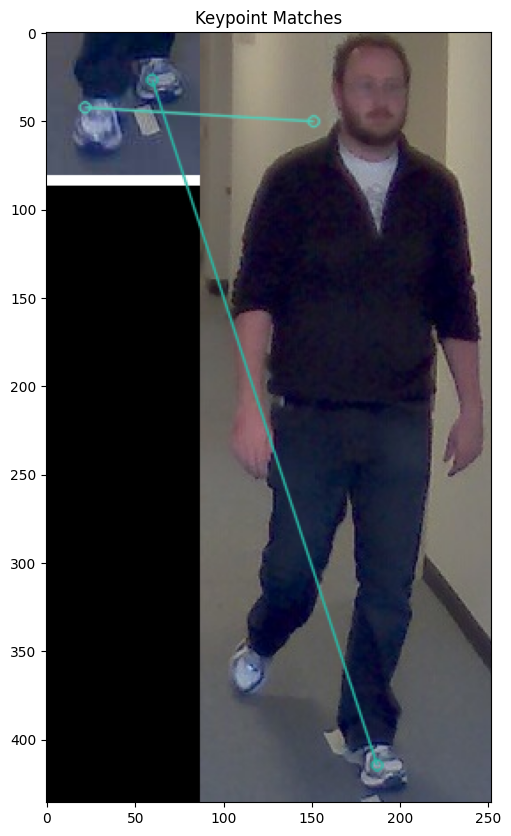

Number of keypoints 0: 47, Number of keypoints 1: 262
Number of good matches: 2
Matching ratio: 0.04
Average matching quality (distance): 305.70


In [43]:
# SIFT 특징점 검출기 생성 (최대 특징수를 1000으로 설정)
sift = cv2.SIFT_create(nfeatures=1000)

# kepoints인 특징점
#각 특징점을 설명하는 벡터인 Descriptors(기술자)
kp0, des0 = sift.detectAndCompute(gray0, None)
kp1, des1 = sift.detectAndCompute(gray1, None)

# BFMatcher (Brute-Force Matcher) : 특징점 매칭
bf = cv2.BFMatcher(cv2.NORM_L2)

# knnMatch 사용하여 매칭 수행
matches = bf.knnMatch(des0, des1, k=2)

# 첫 번째 매칭의 거리가 두 번째 매칭 거리의 일정 비율(0.75)보다 작으면 good_matches
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# 매칭 결과 시각화
img_matches = cv2.drawMatches(image0, kp0, image1, kp1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches")
plt.show()

# 유사도 계산
total_keypoints = min(len(kp0), len(kp1))

#전체 매칭중에 좋은 매칭의 비율
matching_ratio = len(good_matches) / total_keypoints

#모든 좋은 매칭의 거리 값을 더한값
#이것을 기준으로 높으면 가중치를 주는 형식으로 사용
average_distance = sum(match.distance for match in good_matches) / len(good_matches) if good_matches else 0

# 유사도 결과 출력
print(f"Number of keypoints 0: {len(kp0)}, Number of keypoints 1: {len(kp1)}")
print(f"Number of good matches: {len(good_matches)}")
print(f"Matching ratio: {matching_ratio:.2f}")
print(f"Average matching quality (distance): {average_distance:.2f}")

In [44]:
# 이미지 로드
image0 = cv2.imread('./shoe3.PNG') #신발 이미지
image1 = cv2.imread('./pratice1.png') #사람 이미지

# 이미지 전처리 (그레이스케일 변환 및 명암 대비 개선)
gray0 = cv2.cvtColor(image0, cv2.COLOR_BGR2GRAY)
gray0 = cv2.equalizeHist(gray0)  # 명암 대비 개선
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray1 = cv2.equalizeHist(gray1)  # 명암 대비 개선

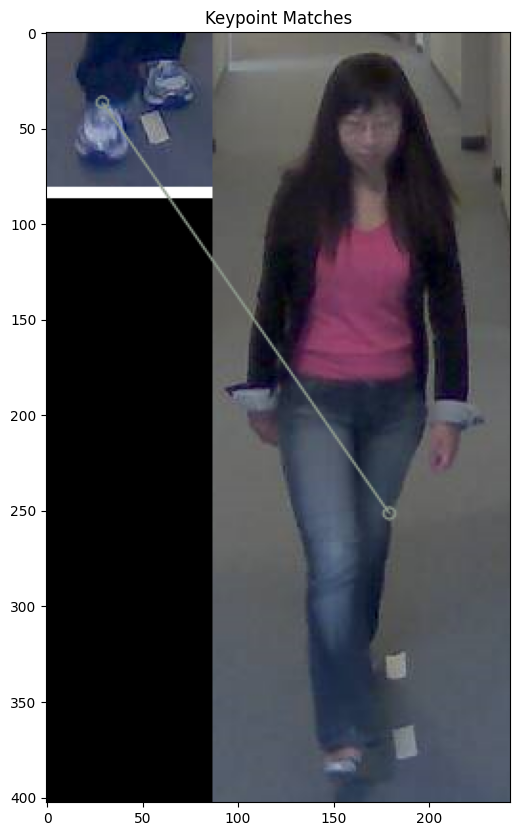

Number of keypoints 0: 47, Number of keypoints 1: 274
Number of good matches: 1
Matching ratio: 0.02
Average matching quality (distance): 181.45


In [46]:
# SIFT 특징점 검출기 생성 (최대 특징수를 1000으로 설정)
sift = cv2.SIFT_create(nfeatures=1000)

# 특징점과 기술자 추출
kp0, des0 = sift.detectAndCompute(gray0, None)
kp1, des1 = sift.detectAndCompute(gray1, None)

# BFMatcher (Brute-Force Matcher) : 특징점 매칭
bf = cv2.BFMatcher(cv2.NORM_L2)

# knnMatch 사용하여 매칭 수행
matches = bf.knnMatch(des0, des1, k=2)

# 첫 번째 매칭의 거리가 두 번째 매칭 거리의 일정 비율(0.75)보다 작으면 good_matches
good_matches = [m for m, n in matches if m.distance < 0.75 * n.distance]

# 매칭 결과 시각화
img_matches = cv2.drawMatches(image0, kp0, image1, kp1, good_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# 결과 출력
plt.figure(figsize=(20, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title("Keypoint Matches")
plt.show()

# 유사도 계산
total_keypoints = min(len(kp0), len(kp1))

#전체 매칭중에 좋은 매칭의 비율
matching_ratio = len(good_matches) / total_keypoints

#모든 좋은 매칭의 거리 값을 더한값
#이것을 기준으로 높으면 가중치를 주는 형식으로 사용
average_distance = sum(match.distance for match in good_matches) / len(good_matches) if good_matches else 0

# 유사도 결과 출력
print(f"Number of keypoints 0: {len(kp0)}, Number of keypoints 1: {len(kp1)}")
print(f"Number of good matches: {len(good_matches)}")
print(f"Matching ratio: {matching_ratio:.2f}")
print(f"Average matching quality (distance): {average_distance:.2f}")